# Creating a distance matrix
In this notebook you will learn how to work with fasta files and generate a distance matrix that you will need to construct your phylogenetic tree.

Import numpy:

In [11]:
#import the libraries
import numpy as np
from Bio import Phylo
import matplotlib.pyplot as plt

We will also need to import SeqIO from the BioPython library:

In [2]:
#pulling our a part form a sequences
from Bio.Seq import Seq
from Bio import SeqIO
coding_dna = Seq("ACGUAUGCUTAA")
coding_dna.translate()


Seq('TYA*', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [33]:
#reading the id of the record
for record in SeqIO.parse("hemoglobin_sequences.fasta","fasta" ):
    print(record.id)
    

ENA|AAZ39745|AAZ39745.1
ENA|AAA49653|AAA49653.1
ENA|AAB05405|AAB05405.1
ENA|CAA43421|CAA43421.1
NW_020825940.1:2006569-2007378
ENA|CAA23700|CAA23700.1
ENA|ACY75383|ACY75383.1
ENA|ACV41403|ACV41403.1
ENA|CAA60490|CAA60490.1
ENA|BAG16710|BAG16710.1
ENA|EHH23170|EHH23170.1
ENA|BAN62839|BAN62839.1
ENA|PNJ24931|PNJ24931.1


Copy and paste the function from the butterfly Notebook that returns the difference between two sequences:

**You will need to make one change: the function needs to find the shortest sequence and stop the analysis at that nucleotide. You can use the "break" command to stop a for loop.**

In [37]:
#stopping at the shortest sequence and finding the number of differences in the sequences

data1 = "ACTGCTACT"
data2 = "AGTCGTA"
def diffnum(Seq1,Seq2):
    diff = 0
    if len(Seq1) < len(Seq2):
        short = Seq1
        long = Seq2
    else:
        short = Seq2
        long = Seq1
    for c, i in enumerate(short):
        if i == len(short):
            break
        else:
            if i != long[c]:
                diff+=1
    return diff
    

Create an empty list and use the SeqIO.parse() function to append each sequence in the fasta file:

In [34]:
#pulling out the sequence for each record and adding it to the list
hemo_list = []
for record in SeqIO.parse("hemoglobin_sequences.fasta","fasta" ):
    hemo_list.append(record.seq)
print(hemo_list)
    

[Seq('ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAG...TAA', SingleLetterAlphabet()), Seq('ATGGTCCATTGGACAGCTGAAGAGAAGGCCGCCATCACTTCTGTATGGCAGAAG...TAA', SingleLetterAlphabet()), Seq('ATGGTTGAGTGGACAGATGCCGAGCGCACAGCCATCCTTGGCCTGTGGGGAAAG...TAG', SingleLetterAlphabet()), Seq('ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAG...AAG', SingleLetterAlphabet()), Seq('ATGGTTGAGTTGACAGAAGCCCAGCGTGGTGCTATCGTTAACCTGTGGGGACAT...ATA', SingleLetterAlphabet()), Seq('ATGGTGCACTGGACTGCTGAGGAGAAGCAGCTCATCACCGGCCTCTGGGGCAAG...TAA', SingleLetterAlphabet()), Seq('ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAG...AGG', SingleLetterAlphabet()), Seq('ATGGTGAATCTGACTGCTGCTGAGAAGACACAAGTCACCAACCTGTGGGGCAAG...TGA', SingleLetterAlphabet()), Seq('ATGGTGCATCTGTCTGCTGAGGAGAAGGAGGCCGTCCTCGGCCTGTGGGGCAAA...TAA', SingleLetterAlphabet()), Seq('ATGGTGCACCTGACTGATGCTGAGAAGGCTGCTGTCTCTGGCCTGTGGGGAAAG...TAA', SingleLetterAlphabet()), Seq('ATGGTGCATCTGACTCCTGAGGAGAAGAATGCCGTCACCACCCTGTGGGGCAAG...TAA', S

Print out the first item in seqs to check that your code worked:

In [35]:
print(hemo_list[0])


ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTGGGTAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAA


In [38]:
diffnum(data1,data2)

3

In [39]:
#pulling out the 13 sequences and comparing them with each other
print(hemo_list)

[Seq('ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAG...TAA', SingleLetterAlphabet()), Seq('ATGGTCCATTGGACAGCTGAAGAGAAGGCCGCCATCACTTCTGTATGGCAGAAG...TAA', SingleLetterAlphabet()), Seq('ATGGTTGAGTGGACAGATGCCGAGCGCACAGCCATCCTTGGCCTGTGGGGAAAG...TAG', SingleLetterAlphabet()), Seq('ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAG...AAG', SingleLetterAlphabet()), Seq('ATGGTTGAGTTGACAGAAGCCCAGCGTGGTGCTATCGTTAACCTGTGGGGACAT...ATA', SingleLetterAlphabet()), Seq('ATGGTGCACTGGACTGCTGAGGAGAAGCAGCTCATCACCGGCCTCTGGGGCAAG...TAA', SingleLetterAlphabet()), Seq('ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAG...AGG', SingleLetterAlphabet()), Seq('ATGGTGAATCTGACTGCTGCTGAGAAGACACAAGTCACCAACCTGTGGGGCAAG...TGA', SingleLetterAlphabet()), Seq('ATGGTGCATCTGTCTGCTGAGGAGAAGGAGGCCGTCCTCGGCCTGTGGGGCAAA...TAA', SingleLetterAlphabet()), Seq('ATGGTGCACCTGACTGATGCTGAGAAGGCTGCTGTCTCTGGCCTGTGGGGAAAG...TAA', SingleLetterAlphabet()), Seq('ATGGTGCATCTGACTCCTGAGGAGAAGAATGCCGTCACCACCCTGTGGGGCAAG...TAA', S

In [68]:
#creating an array of the differences
def compare(sequences):
    my_empty = np.zeros([len(sequences),len(sequences)])
    for i in range(0,len(sequences)):
        for j in range(0,len(sequences)):
            my_empty[i,j] = diffnum(sequences[i], sequences[j])
    np.savetxt("diff_array",my_empty, fmt = '%.0f')
    return my_empty

Print out just the sequence from the first species using the .seq method:

In [66]:
#printing our array
compare(hemo_list)

array([[  0., 168., 195.,   3., 302., 114.,   0.,  75.,  70.,  79.,  22.,
        155.,   8.],
       [168.,   0., 213., 138., 313., 166., 114., 179., 169., 170., 166.,
        198., 170.],
       [195., 213.,   0., 138., 299., 185., 110., 202., 201., 183., 199.,
        215., 198.],
       [  3., 138., 138.,   0., 247.,  94.,   1.,  62.,  60.,  63.,  18.,
        122.,   4.],
       [302., 313., 299., 247.,   0., 311., 209., 310., 303., 304., 301.,
        324., 299.],
       [114., 166., 185.,  94., 311.,   0.,  77., 117., 115., 127., 114.,
        125., 115.],
       [  0., 114., 110.,   1., 209.,  77.,   0.,  54.,  45.,  51.,  17.,
        104.,   3.],
       [ 75., 179., 202.,  62., 310., 117.,  54.,   0.,  84.,  88.,  70.,
        136.,  71.],
       [ 70., 169., 201.,  60., 303., 115.,  45.,  84.,   0.,  89.,  65.,
        147.,  66.],
       [ 79., 170., 183.,  63., 304., 127.,  51.,  88.,  89.,   0.,  78.,
        149.,  76.],
       [ 22., 166., 199.,  18., 301., 114.,  17., 

Print out the length of the seqs list to see how many sequences there are:

Create a function that takes the list of sequences as its only argument and returns a numpy array with the hamming distance of each pair of sequences:

Hint: You will need to create an empty two dimensional numpy array with the same number of rows and columns as there are sequences in your list.

Run your function:

In [12]:

my_tree = Phylo.read("/Users/brownscholar/Documents/tree_data.txt","newick")
print(my_tree)


Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=3.21429, name='Orangutan')
        Clade(branch_length=3.64583)
            Clade(branch_length=-4.14583, name='Gorilla')
            Clade(branch_length=3.3)
                Clade(branch_length=13.95, name='Macaque')
                Clade(branch_length=8.375)
                    Clade(branch_length=-8.75, name='Chimpanzee')
                    Clade(branch_length=8.45833)
                        Clade(branch_length=14.97917)
                            Clade(branch_length=14.01562)
                                Clade(branch_length=95.0, name='Frog')
                                Clade(branch_length=18.5)
                                    Clade(branch_length=95.68182, name='Fish')
                                    Clade(branch_length=203.31818, name='Eel')
                            Clade(branch_length=12.35938)
                                Clade(branch_length=47.23611, name='Chicken')
                  

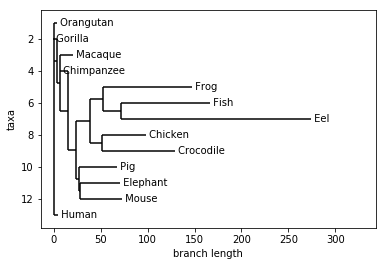

In [14]:
#creating out phylogenetic tree
Phylo.draw(my_tree)